In [10]:
from __future__ import print_function
import pandas as pd
import os

In [55]:
!curl https://data.cityofnewyork.us/api/views/k397-673e/rows.csv?accessType=DOWNLOAD>citywide_payroll.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  386M    0  383M    0     0  3349k      0 --:--:--  0:01:57 --:--:-- 3560k  0 --:--:--  0:01:30 --:--:-- 2938k   0  386M    0     0  3352k      0 --:--:--  0:01:58 --:--:-- 3608k


In [56]:
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/sds695/PUIdata


In [57]:
!mv citywide_payroll.csv $PUIDATA

In [58]:
!ls $PUIDATA

citywide_payroll.csv  NYC_Jobs.csv


In [62]:
city_pay = pd.read_csv("%s/citywide_payroll.csv"%os.getenv("PUIDATA"))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [96]:
city_pay.head(7)

,Fiscal Year,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2016,DISTRICT ATTORNEY-MANHATTAN,ABA'AHMID,RAHASHEEM,E,07/14/2003,MANHATTAN,COMMUNITY ASSOCIATE ...,ACTIVE,47678.0,per Annum,1830.00,47166.03,2.25,57.28,0.0
1,2016,DISTRICT ATTORNEY-MANHATTAN,ABENSUR,MARGARET,NaN,06/12/1995,MANHATTAN,ADMINISTRATIVE ACCOUNTANT ...,ACTIVE,119959.0,per Annum,1831.00,119042.50,0.00,0.00,0.0
2,2016,DISTRICT ATTORNEY-MANHATTAN,ABOUNAOUM,ANDREA,L,10/11/2011,MANHATTAN,COMMUNITY ASSOCIATE ...,ON LEAVE,39966.0,per Annum,1181.68,27452.62,1.00,21.34,33.0
3,2016,DISTRICT ATTORNEY-MANHATTAN,ABRAHAM,JONATHAN,J,12/01/2014,MANHATTAN,COMPUTER SYSTEMS MANAGER ...,ACTIVE,116000.0,per Annum,1831.00,115104.57,0.00,0.00,0.0
4,2016,DISTRICT ATTORNEY-MANHATTAN,ABRAMS,JOSEPH,NaN,05/21/2015,MANHATTAN,COLLEGE AIDE ...,CEASED,1.0,per Hour,0.00,3500.00,0.00,0.00,0.0
5,2016,DISTRICT ATTORNEY-MANHATTAN,ABREU,JENNIFER,NaN,09/04/2012,MANHATTAN,ASSISTANT DISTRICT ATTORNEY ...,ACTIVE,71500.0,per Annum,1831.00,71967.34,0.00,0.00,0.0
6,2016,DISTRICT ATTORNEY-MANHATTAN,ABREU,JUAN,D,09/04/2007,MANHATTAN,ASSISTANT DISTRICT ATTORNEY ...,ACTIVE,88000.0,per Annum,1831.00,87614.01,0.00,0.00,750.0


In [64]:
city_pay.tail(3)

,Fiscal Year,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
2194485,2017,DISTRICT ATTORNEY-SPECIAL NARC,XXX,XXX,NaN,03/17/1997,MANHATTAN,SUPERVISING RACKETS INVESTIGATOR,ACTIVE,89686.0,per Annum,2051.43,96646.24,63.0,4937.42,3624.24
2194486,2017,DISTRICT ATTORNEY-SPECIAL NARC,XXX,XXX,J,04/19/1993,MANHATTAN,SUPERVISING RACKETS INVESTIGATOR,ACTIVE,94245.0,per Annum,2051.43,105281.70,22.0,1544.83,3624.24
2194487,2017,DISTRICT ATTORNEY-SPECIAL NARC,XXX,XXX,L,02/10/1992,MANHATTAN,SUPERVISING RACKETS INVESTIGATOR,CEASED,89780.0,per Annum,1235.43,78923.55,160.0,12509.95,2388.87


In [65]:
city_pay.columns

Index(['Fiscal Year', 'Agency Name', 'Last Name', 'First Name', 'Mid Init',
       'Agency Start Date', 'Work Location Borough', 'Title Description',
       'Leave Status as of June 30', 'Base Salary', 'Pay Basis',
       'Regular Hours', 'Regular Gross Paid', 'OT Hours', 'Total OT Paid',
       'Total Other Pay'],
      dtype='object')

In [66]:
city_pay.size

35111808

In [68]:
city_pay2c=city_pay[["Regular Hours","Regular Gross Paid"]]

In [70]:
city_pay2c.head()

,Regular Hours,Regular Gross Paid
0,1830.00,47166.03
1,1831.00,119042.50
2,1181.68,27452.62
3,1831.00,115104.57
4,0.00,3500.00


In [71]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


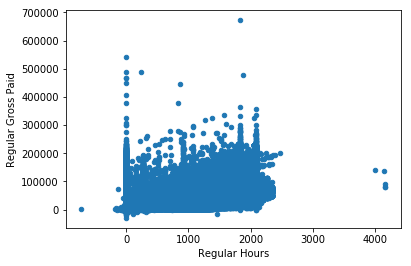

In [73]:
city_pay2c.plot(x="Regular Hours", y="Regular Gross Paid",kind='scatter')

Figure 1: This figure shows the Gross Pay vs Regular Hours. The plot shows a relation between the two fields which seems to be directly propotional in nature.

In [78]:
url="https://data.cityofnewyork.us/resource/4qxi-jgbe.json"

In [79]:
df = pd.read_json(url)

In [97]:
df.head(8)

,agency_name,agency_start_date,base_salary,first_name,fiscal_year,last_name,leave_status_as_of_july_31,mid_init,ot_hours,pay_basis,regular_gross_paid,regular_hours,title_description,total_ot_paid,total_other_pay,work_location_borough
0,DISTRICT ATTORNEY-MANHATTAN,2003-07-14T00:00:00.000,47678.0,RAHASHEEM,2016,ABA'AHMID,ACTIVE,E,2.25,per Annum,47166.03,1830.00,COMMUNITY ASSOCIATE ...,57.28,0.0,MANHATTAN
1,DISTRICT ATTORNEY-MANHATTAN,1995-06-12T00:00:00.000,119959.0,MARGARET,2016,ABENSUR,ACTIVE,NaN,0.00,per Annum,119042.50,1831.00,ADMINISTRATIVE ACCOUNTANT ...,0.00,0.0,MANHATTAN
2,DISTRICT ATTORNEY-MANHATTAN,2011-10-11T00:00:00.000,39966.0,ANDREA,2016,ABOUNAOUM,ON LEAVE,L,1.00,per Annum,27452.62,1181.68,COMMUNITY ASSOCIATE ...,21.34,33.0,MANHATTAN
3,DISTRICT ATTORNEY-MANHATTAN,2014-12-01T00:00:00.000,116000.0,JONATHAN,2016,ABRAHAM,ACTIVE,J,0.00,per Annum,115104.57,1831.00,COMPUTER SYSTEMS MANAGER ...,0.00,0.0,MANHATTAN
4,DISTRICT ATTORNEY-MANHATTAN,2015-05-21T00:00:00.000,1.0,JOSEPH,2016,ABRAMS,CEASED,NaN,0.00,per Hour,3500.00,0.00,COLLEGE AIDE ...,0.00,0.0,MANHATTAN
5,DISTRICT ATTORNEY-MANHATTAN,2012-09-04T00:00:00.000,71500.0,JENNIFER,2016,ABREU,ACTIVE,NaN,0.00,per Annum,71967.34,1831.00,ASSISTANT DISTRICT ATTORNEY ...,0.00,0.0,MANHATTAN
6,DISTRICT ATTORNEY-MANHATTAN,2007-09-04T00:00:00.000,88000.0,JUAN,2016,ABREU,ACTIVE,D,0.00,per Annum,87614.01,1831.00,ASSISTANT DISTRICT ATTORNEY ...,0.00,750.0,MANHATTAN
7,DISTRICT ATTORNEY-MANHATTAN,2016-06-06T00:00:00.000,1.0,JENNIFER,2016,ACEVEDO,ACTIVE,NaN,0.00,per Hour,500.00,0.00,COLLEGE AIDE ...,0.00,0.0,MANHATTAN


In [81]:
df.columns

Index(['agency_name', 'agency_start_date', 'base_salary', 'first_name',
       'fiscal_year', 'last_name', 'leave_status_as_of_july_31', 'mid_init',
       'ot_hours', 'pay_basis', 'regular_gross_paid', 'regular_hours',
       'title_description', 'total_ot_paid', 'total_other_pay',
       'work_location_borough'],
      dtype='object')

In [87]:
cpr_3c = df[['agency_start_date', 'base_salary', 'total_ot_paid']]

In [88]:
cpr_3c.rename(columns= {'agency_start_date':'Agency Start Date',
                       'base_salary':'Base Salary',
                       'total_ot_paid':'Total OT Paid'}, inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


Text(0,0.5,'Number')

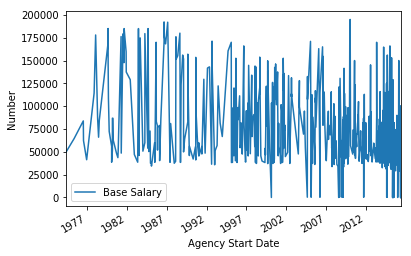

In [93]:
ax=cpr_3c.plot(x='Agency Start Date',y='Base Salary')
ax.set_ylabel("Number")

Figure 2: This plot shows the base salary over the years. There seems to be a repeating pattern where the salary goes up to a local maximum and then drops.

Text(0,0.5,'Number')

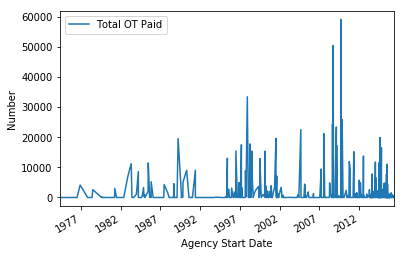

In [95]:
ax=cpr_3c.plot(x='Agency Start Date',y='Total OT Paid')
ax.set_ylabel("Number")

Figure 3: This plot shows the Total OT Paid over the years. There are many parts where there is 0 total overtime paid which may be something we need to investigate further.